In [78]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#### Problem statement

#### Data Gathering

In [58]:
df = pd.read_csv('Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [60]:
df.rename({"Hours Studied":"Hours_Studied","Previous Scores":"Previous_Scores",
           'Extracurricular Activities':'Extracurricular_Activities',
          'Sleep Hours':'Sleep_Hours',
          'Sample Question Papers Practiced':'Sample_Question_Papers_Practiced',
          "Performance Index":'Performance_Index'} , axis = 1 , inplace = True)
df

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


#### EDA

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours_Studied                     10000 non-null  int64  
 1   Previous_Scores                   10000 non-null  int64  
 2   Extracurricular_Activities        10000 non-null  object 
 3   Sleep_Hours                       10000 non-null  int64  
 4   Sample_Question_Papers_Practiced  10000 non-null  int64  
 5   Performance_Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [62]:
df.isna().sum()

Hours_Studied                       0
Previous_Scores                     0
Extracurricular_Activities          0
Sleep_Hours                         0
Sample_Question_Papers_Practiced    0
Performance_Index                   0
dtype: int64

In [63]:
df['Extracurricular_Activities'].value_counts()

Extracurricular_Activities
No     5052
Yes    4948
Name: count, dtype: int64

In [64]:
Extracurricular_Activities_Dict = {"Yes" : 1 , "No" : 0}
df['Extracurricular_Activities'].replace(Extracurricular_Activities_Dict , inplace = True)
df

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours_Studied                     10000 non-null  int64  
 1   Previous_Scores                   10000 non-null  int64  
 2   Extracurricular_Activities        10000 non-null  int64  
 3   Sleep_Hours                       10000 non-null  int64  
 4   Sample_Question_Papers_Practiced  10000 non-null  int64  
 5   Performance_Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [66]:
df.corr()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
Hours_Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous_Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular_Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep_Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample_Question_Papers_Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance_Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

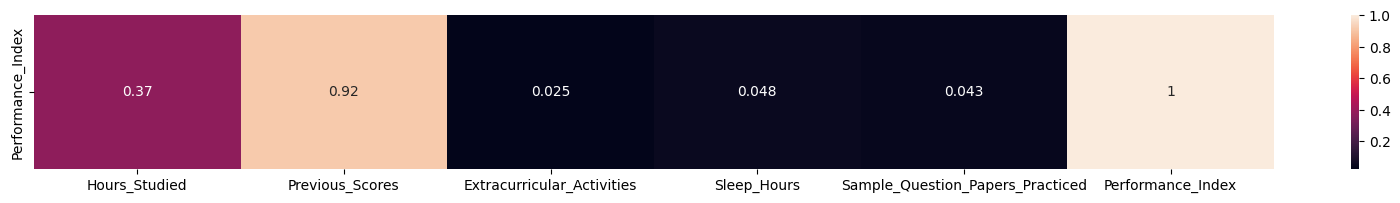

In [67]:
plt.figure(figsize = (20,2))
sns.heatmap(df.corr().tail(1) , annot = True)

#### Model Training

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [68]:
x = df.drop('Performance_Index' , axis = 1)
y = df['Performance_Index']

In [21]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 32)


In [22]:
linear_reg = LinearRegression()

In [23]:
linear_reg.fit(x_train,y_train)

LinearRegression()

#### Model Evaluation

In [26]:
#testing dataset
y_test_pred = linear_reg.predict(x_test)

mae = mean_absolute_error(y_test,y_test_pred)
print("MAE : ",mae)

mse = mean_squared_error(y_test,y_test_pred)
print("MSE : ",mse)

rmse = np.sqrt(mse)
print("RMSE : ",rmse)

r2 = r2_score(y_test,y_test_pred)
print("R2_Score : ",r2)

MAE :  1.6363658670764847
MSE :  4.210818767164687
RMSE :  2.052027964518195
R2_Score :  0.9884880479105617


In [38]:
#training dataset
y_train_pred = linear_reg.predict(x_train)

mae = mean_absolute_error(y_train,y_train_pred)
print("MAE : ",mae)

mse = mean_squared_error(y_train,y_train_pred)
print("MSE : ",mse)

rmse = np.sqrt(mse)
print("RMSE : ",rmse)

r2 = r2_score(y_train,y_train_pred)
print("R2_Score : ",r2)

MAE :  1.6114381577736347
MSE :  4.132636720356622
RMSE :  2.032888762415844
R2_Score :  0.988836128746288


#### Normality

In [31]:
residual = y_train - y_train_pred
residual

194    -2.501603
8097   -2.684449
2445    0.428378
1715    0.296788
5290   -2.576099
          ...   
8444   -0.067961
7571   -0.455823
4030   -0.575007
9526    0.272413
9771   -1.471635
Name: Performance Index, Length: 7500, dtype: float64

<Axes: xlabel='Performance Index', ylabel='Density'>

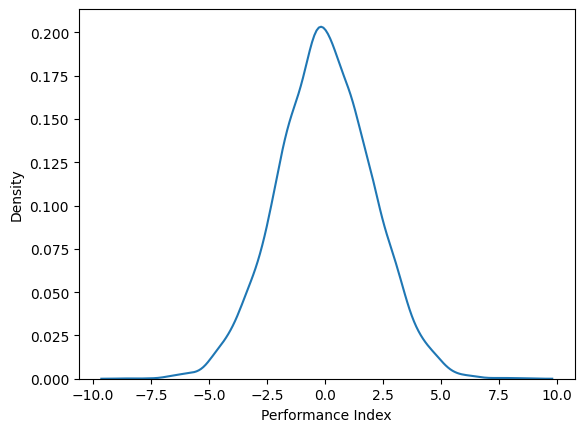

In [33]:
sns.kdeplot(residual)

In [34]:
import statsmodels.api as sm


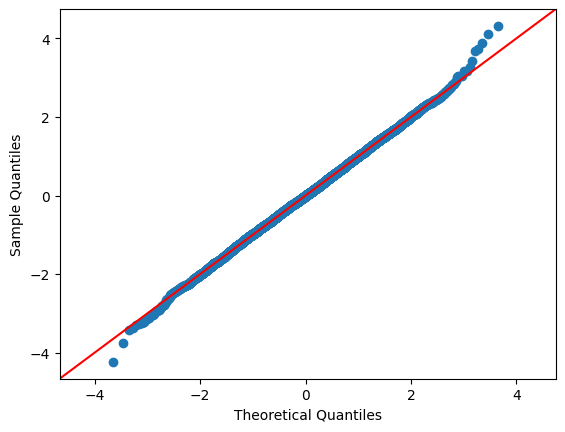

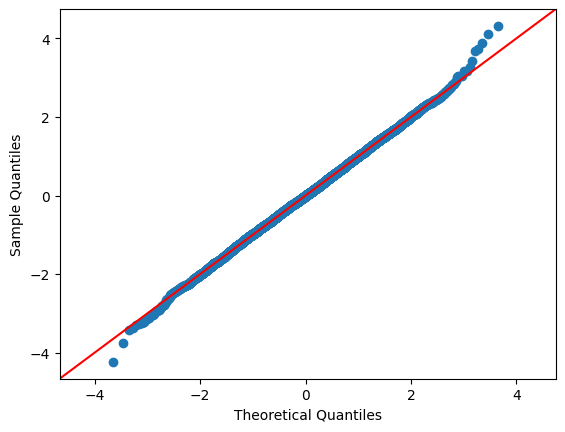

In [37]:
sm.qqplot(residual , line = '45' , fit = True)

#### Homoscadasticity

<Axes: xlabel='Performance Index', ylabel='Performance Index'>

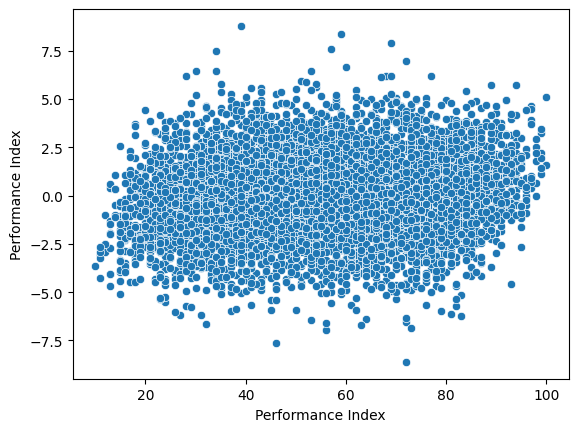

In [40]:
sns.scatterplot(x = y_train , y = residual)

#### Single Row Prediction

In [69]:
test_array = x_train[55:56]
test_array

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
4627,4,97,1,5,5


In [70]:
y_train[55:56]

4627    80.0
Name: Performance Index, dtype: float64

In [72]:
linear_reg.predict(test_array)[0]

80.10196317053695

In [74]:
x.columns

Index(['Hours_Studied', 'Previous_Scores', 'Extracurricular_Activities',
       'Sleep_Hours', 'Sample_Question_Papers_Practiced'],
      dtype='object')

In [79]:
Hours_Studied = 4
Previous_Scores = 97
Extracurricular_Activities = 'Yes'
Sleep_Hours = 5
Sample_Question_Papers_Practiced = 5

test_array = np.zeros([1,5])
test_array[0,0] = Hours_Studied
test_array[0,1] = Previous_Scores
test_array[0,2] = Extracurricular_Activities_Dict[Extracurricular_Activities]
test_array[0,3] = Sleep_Hours
test_array[0,4] = Sample_Question_Papers_Practiced

predicted_performance = linear_reg.predict(test_array)
print("Predicted performance is : ",predicted_performance)

Predicted performance is :  [80.10196317]


In [80]:
import pickle
import json

In [82]:
with open('Linear_regression.pkl','wb') as f:
    pickle.dump(linear_reg , f)

In [85]:
column_list = x.columns.to_list()
project_data = {"column_list" : column_list}
project_data

{'column_list': ['Hours_Studied',
  'Previous_Scores',
  'Extracurricular_Activities',
  'Sleep_Hours',
  'Sample_Question_Papers_Practiced']}

In [86]:
with open('project_data.json','w') as f:
    json.dump(project_data , f)

In [1]:
import os

In [5]:
p = os.path.join(os.getcwd(),'Static','Linear_regression.pkl')
p

'G:\\Python & data science\\Priten\\Projects\\Student_Performance\\Static\\Linear_regression.pkl'